## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

# Check for Descriptive Statistics

In [4]:
df.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.90,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
1%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.094680,21.000000,0.000000
5%,0.000000,79.000000,38.700000,0.000000,0.000000,21.800000,0.140350,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000


# Check for Missing Values

In [5]:
df.isnull().sum()/df.count()
#df.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [6]:
# There are no missing values in the data 

In [7]:
df.quantile(0.01)

Pregnancies                  0.00000
Glucose                     57.00000
BloodPressure                0.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                          0.00000
DiabetesPedigreeFunction     0.09468
Age                         21.00000
Outcome                      0.00000
Name: 0.01, dtype: float64

In [8]:
df['Outcome'].mean()

0.3489583333333333

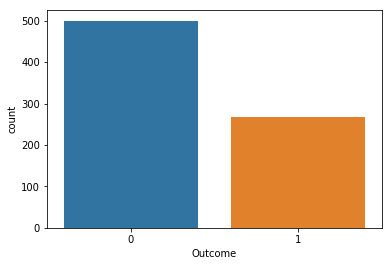

In [9]:
sns.countplot(x='Outcome',data=df)
plt.show()

## Visualizing the data for any Relations

In [10]:
#Frequency Distribution by using value_counts()
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [11]:
df.groupby('Pregnancies')['Outcome'].agg(['mean','count'])

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


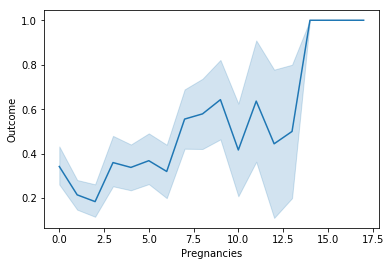

In [12]:
from numpy import mean
ax = sns.lineplot(x="Pregnancies", y="Outcome", data=df, estimator=mean)

In [13]:
# X=['Pregancies']

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


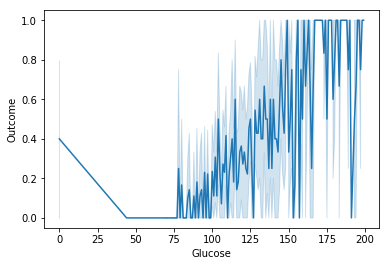

In [14]:
from numpy import mean
ax=sns.lineplot(x="Glucose", y="Outcome", data=df, estimator=mean)

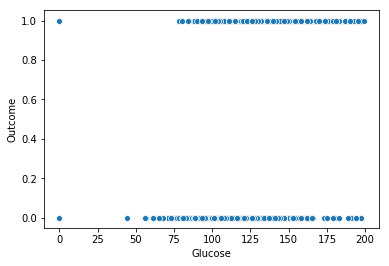

In [15]:
from numpy import mean
ax=sns.scatterplot(x="Glucose", y="Outcome", data=df, estimator=mean)

In [16]:
# Create Buckets/Ranks of variables and then across each bucket/Rank study the movement of event rate (probability of diabetes)

# This is also called Ranks and Plot Step. It is highly visual and useful for project presentations and easy communication

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


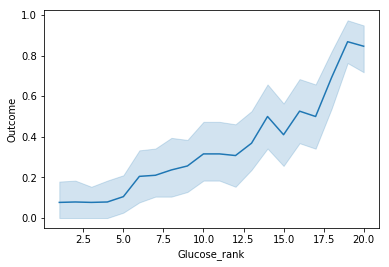

In [17]:
df['Glucose_rank']=pd.qcut(df['Glucose'].rank(method='first').values,20,duplicates='drop').codes+1
#df.groupby('Glucose_rank')['Outcome'].mean()
from numpy import mean
ax=sns.lineplot(x="Glucose_rank", y="Outcome", data=df, estimator=mean)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_rank
0,6,148,72,35,0,33.6,0.627,50,1,17
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,20
3,1,89,66,23,94,28.1,0.167,21,0,3
4,0,137,40,35,168,43.1,2.288,33,1,15


C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


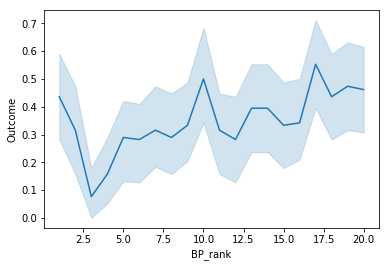

In [19]:
# Ranks and Plots - BloodPressure
df['BP_rank']=pd.qcut(df['BloodPressure'].rank(method='first').values,20,duplicates='drop').codes+1
#df.groupby('BP_rank')['Outcome'].count()
from numpy import mean
ax=sns.lineplot(x="BP_rank", y="Outcome", data=df, estimator=mean)

In [20]:
# X=['Pregancies','Glucose','BloodPressure']

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


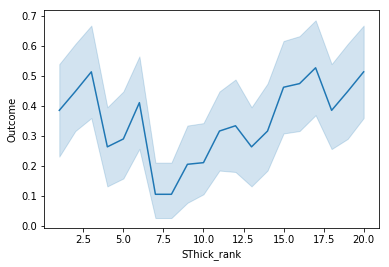

In [21]:
# Ranks and Plots - SkinThickness
df['SThick_rank']=pd.qcut(df['SkinThickness'].rank(method='first').values,20,duplicates='drop').codes+1
#df.groupby('BP_rank')['Outcome'].count()
from numpy import mean
ax=sns.lineplot(x="SThick_rank", y="Outcome", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


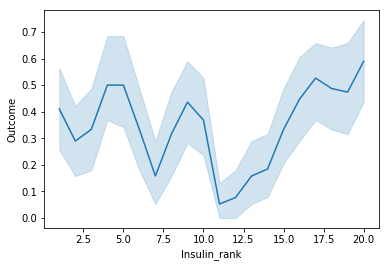

In [22]:
# Ranks and Plots - Insulin
df['Insulin_rank']=pd.qcut(df['Insulin'].rank(method='first').values,20,duplicates='drop').codes+1
#df.groupby('BP_rank')['Outcome'].count()
from numpy import mean
ax=sns.lineplot(x="Insulin_rank", y="Outcome", data=df, estimator=mean)

In [23]:
# X=['Pregancies','Glucose','BloodPressure','Insulin']

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


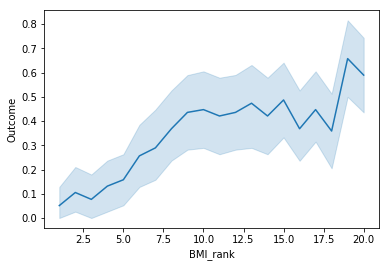

In [24]:
# Ranks and Plots - BMI
df['BMI_rank']=pd.qcut(df['BMI'].rank(method='first').values,20,duplicates='drop').codes+1
#df.groupby('BP_rank')['Outcome'].count()
from numpy import mean
ax=sns.lineplot(x="BMI_rank", y="Outcome", data=df, estimator=mean)

In [25]:
# X=['Pregancies','Glucose','BloodPressure','Insulin','BMI']

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


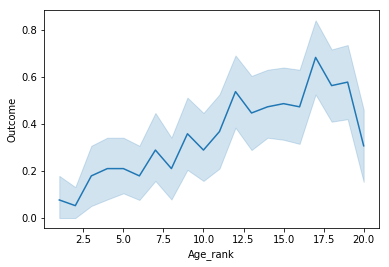

In [26]:
# Ranks and Plots - Age
df['Age_rank']=pd.qcut(df['Age'].rank(method='first').values,20,duplicates='drop').codes+1
#df.groupby('BP_rank')['Outcome'].count()
from numpy import mean
ax=sns.lineplot(x="Age_rank", y="Outcome", data=df, estimator=mean)

In [27]:
# X=['Pregancies','Glucose','BloodPressure','Insulin','BMI','Age']

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


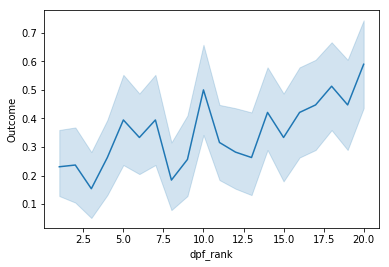

In [28]:
# Ranks and Plots - DiabetesPedigreeFunction
df['dpf_rank']=pd.qcut(df['DiabetesPedigreeFunction'].rank(method='first').values,20,duplicates='drop').codes+1
#df.groupby('BP_rank')['Outcome'].count()
from numpy import mean
ax=sns.lineplot(x="dpf_rank", y="Outcome", data=df, estimator=mean)

In [29]:
# X=['Pregnancies','Glucose',,'BloodPressure','Insulin','BMI','Age','DiabetesPedigreeFunction']

## Feature Selection

In [55]:
X = df[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','Age','DiabetesPedigreeFunction']]
y = df[['Outcome']]

In [31]:
# Dropping Features based on Significance Tests
X_new = df[['Pregnancies','Glucose','BloodPressure','Age',]]
y = df[['Outcome']]

## Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [33]:
# Train Test Split after the significance tests are done

X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

In [34]:
y_train.mean()

Outcome    0.350093
dtype: float64

In [35]:
y_test.mean()

Outcome    0.34632
dtype: float64

In [36]:
X_train.shape

(537, 4)

In [37]:
import statsmodels.api as sm
logit=sm.Logit(y,X_new)
result=logit.fit()
print((result.summary2()))

Optimization terminated successfully.
         Current function value: 0.610634
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.056     
Dependent Variable: Outcome          AIC:              945.9335  
Date:               2021-01-30 11:33 BIC:              964.5086  
No. Observations:   768              Log-Likelihood:   -468.97   
Df Model:           3                LL-Null:          -496.74   
Df Residuals:       764              LLR p-value:      5.2394e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Pregnancies        0.1244   0.0284  4.3757 0.0000  0.0687  0.1801
Glucose            0.0140   0.0023  6.0801 0.0000  0.0095  0.0185


## Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Anaconda_Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

## Predictions

In [39]:
y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [40]:
y_pred=logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.74


## Performance & Accuracy

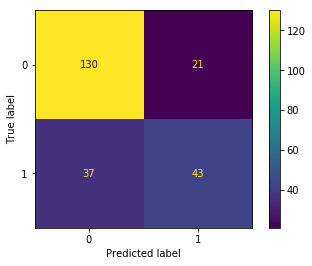

In [41]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

# Make Class Predictions

In [42]:
y_pred=logreg.predict(X_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.7489177489177489
Precision: 0.671875
Recall: 0.5375
f1_score: 0.5972222222222222


In [44]:
y_predict=logreg.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
y_preicted_probability=logreg.predict_proba(X_test)
y_preicted_probability

array([[0.77958535, 0.22041465],
       [0.82273591, 0.17726409],
       [0.84191559, 0.15808441],
       [0.74204772, 0.25795228],
       [0.4108109 , 0.5891891 ],
       [0.68877103, 0.31122897],
       [0.95603797, 0.04396203],
       [0.69120048, 0.30879952],
       [0.36311589, 0.63688411],
       [0.26050558, 0.73949442],
       [0.65225608, 0.34774392],
       [0.0979437 , 0.9020563 ],
       [0.46205077, 0.53794923],
       [0.80466719, 0.19533281],
       [0.9163088 , 0.0836912 ],
       [0.71125176, 0.28874824],
       [0.91318717, 0.08681283],
       [0.90512494, 0.09487506],
       [0.15278286, 0.84721714],
       [0.62532622, 0.37467378],
       [0.72926229, 0.27073771],
       [0.90902352, 0.09097648],
       [0.62724585, 0.37275415],
       [0.89866193, 0.10133807],
       [0.49588802, 0.50411198],
       [0.12447135, 0.87552865],
       [0.77695794, 0.22304206],
       [0.86649684, 0.13350316],
       [0.8669954 , 0.1330046 ],
       [0.87210848, 0.12789152],
       [0.

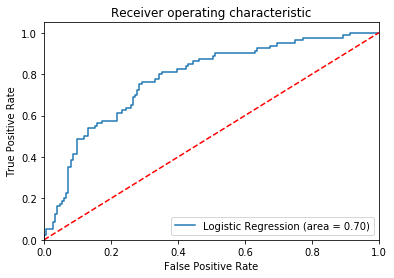

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [47]:
# Gains Chart Code

y_pred_prob = logreg.predict_proba(X_new)[:, 1] #ndarray
df['y_pred_P']=pd.DataFrame(y_pred_prob) #converted to a DataFrame
df['P_Rank_RF']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1 #Apply qcut on the DataFrame
rank_df=df.groupby('P_Rank_RF')['Outcome'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df

,count,mean
P_Rank_RF,,
10,77,0.779221
9,77,0.740260
8,77,0.428571
7,76,0.460526
6,77,0.389610
5,77,0.298701
4,76,0.197368
3,77,0.077922
2,77,0.064935


In [48]:
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df
#sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
#sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
#sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
#sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
#sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
#sorted_reindexed=sorted_rank_df.reset_index()
#sorted_reindexed['decile']=sorted_reindexed.index+1
#sorted_reindexed

,count,mean,N_events
P_Rank_RF,,,
10,77,0.779221,60.0
9,77,0.740260,57.0
8,77,0.428571,33.0
7,76,0.460526,35.0
6,77,0.389610,30.0
5,77,0.298701,23.0
4,76,0.197368,15.0
3,77,0.077922,6.0
2,77,0.064935,5.0


In [49]:
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df
#sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
#sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
#sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
#sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
#sorted_reindexed=sorted_rank_df.reset_index()
#sorted_reindexed['decile']=sorted_reindexed.index+1
#sorted_reindexed

,count,mean,N_events,cum_events
P_Rank_RF,,,,
10,77,0.779221,60.0,60.0
9,77,0.740260,57.0,117.0
8,77,0.428571,33.0,150.0
7,76,0.460526,35.0,185.0
6,77,0.389610,30.0,215.0
5,77,0.298701,23.0,238.0
4,76,0.197368,15.0,253.0
3,77,0.077922,6.0,259.0
2,77,0.064935,5.0,264.0


In [50]:
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df
#sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['cum_events'])
#sorted_rank_df
#sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
#sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
#sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
#sorted_reindexed=sorted_rank_df.reset_index()
#sorted_reindexed['decile']=sorted_reindexed.index+1
#sorted_reindexed

,count,mean,N_events,cum_events,event_cap
P_Rank_RF,,,,,
10,77,0.779221,60.0,60.0,0.223881
9,77,0.740260,57.0,117.0,0.212687
8,77,0.428571,33.0,150.0,0.123134
7,76,0.460526,35.0,185.0,0.130597
6,77,0.389610,30.0,215.0,0.111940
5,77,0.298701,23.0,238.0,0.085821
4,76,0.197368,15.0,253.0,0.055970
3,77,0.077922,6.0,259.0,0.022388
2,77,0.064935,5.0,264.0,0.018657


In [51]:
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random_capture']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random_capture
0,10,77,0.779221,60.0,60.0,0.223881,0.223881,0.100260,0.100260,1,2.232991
1,9,77,0.740260,57.0,117.0,0.212687,0.436567,0.100260,0.200521,2,2.177166
2,8,77,0.428571,33.0,150.0,0.123134,0.559701,0.100260,0.300781,3,1.860826
3,7,76,0.460526,35.0,185.0,0.130597,0.690299,0.098958,0.399740,4,1.726871
4,6,77,0.389610,30.0,215.0,0.111940,0.802239,0.100260,0.500000,5,1.604478
5,5,77,0.298701,23.0,238.0,0.085821,0.888060,0.100260,0.600260,6,1.479457
6,4,76,0.197368,15.0,253.0,0.055970,0.944030,0.098958,0.699219,7,1.350121
7,3,77,0.077922,6.0,259.0,0.022388,0.966418,0.100260,0.799479,8,1.208809
8,2,77,0.064935,5.0,264.0,0.018657,0.985075,0.100260,0.899740,9,1.094844
9,1,77,0.051948,4.0,268.0,0.014925,1.000000,0.100260,1.000000,10,1.000000


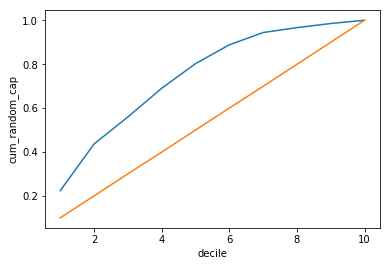

In [52]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)

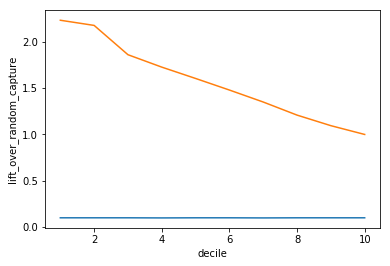

In [53]:
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="lift_over_random_capture", data=sorted_reindexed)

In [54]:
# Interview Question - With increase in event rate in the data, what outcome will you expect in terms of Model Lift?
# A) Model Lift will increse
# B) Model Lift will decrease

# Answer (B) - With increased event rate, the model does not have a lot of opportunity to improve your chances
# of success. That's why the Model Lift will suffer. However Model Accuracy will improve